In [103]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
import seaborn as sns
from google.colab import drive

In [104]:
data=pd.read_csv("/content/drive/MyDrive/1000_Companies.csv")
data

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.800,471784.1000,New York,192261.83000
1,162597.70,151377.590,443898.5300,California,191792.06000
2,153441.51,101145.550,407934.5400,Florida,191050.39000
3,144372.41,118671.850,383199.6200,New York,182901.99000
4,142107.34,91391.770,366168.4200,Florida,166187.94000
...,...,...,...,...,...
995,54135.00,118451.999,173232.6695,California,95279.96251
996,134970.00,130390.080,329204.0228,California,164336.60550
997,100275.47,241926.310,227142.8200,California,413956.48000
998,128456.23,321652.140,281692.3200,California,333962.19000


In [105]:
#Extracting features
Features = data.iloc[:, :-1]  
Features.head()


,R&D Spend,Administration,Marketing Spend,State
0,165349.20,136897.80,471784.10,New York
1,162597.70,151377.59,443898.53,California
2,153441.51,101145.55,407934.54,Florida
3,144372.41,118671.85,383199.62,New York
4,142107.34,91391.77,366168.42,Florida


In [106]:
#Extracting target
Target= data.iloc[:, -1]
Target.head()

0    192261.83
1    191792.06
2    191050.39
3    182901.99
4    166187.94
Name: Profit, dtype: float64

In [107]:
#Encoding 
data['State'].unique()
states = pd.get_dummies(Features['State'])
states.head()

,California,Florida,New York
0,0,0,1
1,1,0,0
2,0,1,0
3,0,0,1
4,0,1,0


In [108]:
#Dropping states column
Features = Features.drop('State', axis=1)
#Replacing with hot-encoded column
Features = pd.concat([Features, states], axis=1)
Features.head()

,R&D Spend,Administration,Marketing Spend,California,Florida,New York
0,165349.20,136897.80,471784.10,0,0,1
1,162597.70,151377.59,443898.53,1,0,0
2,153441.51,101145.55,407934.54,0,1,0
3,144372.41,118671.85,383199.62,0,0,1
4,142107.34,91391.77,366168.42,0,1,0


In [109]:
#Splitting data into training and testing data
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

Features_train, Features_test, Target_train, Target_test = train_test_split(Features, Target, test_size=0.2, random_state=0)
model = LinearRegression()
model.fit(Features_train, Target_train)

LinearRegression()

In [110]:
#Performing Linear Regression and getting predictions
Target_predictions = model.predict(Features_test)
Target_predictions

array([ 89790.61532916,  88427.07187361,  94894.67836972, 175680.8672561 ,
        83411.73042089, 110571.90200074, 132145.2293644 ,  91473.37719687,
       164597.05380606,  53222.82667401,  66950.1905099 , 150566.43987004,
       126915.20858596,  59337.85971051, 177513.91053061,  75316.28143051,
       118248.14406603, 164574.40699901, 170937.28981069, 182069.11645084,
       118845.03252689,  85669.95112229, 180992.59396143,  84145.08220145,
       105005.83769214, 101233.56772747,  53831.07669092,  56881.41475225,
        68896.39346905, 210040.00765883, 120778.72270894, 111724.87157654,
       101487.90541518, 137959.02649623,  63969.95996744, 108857.91214126,
       186014.72531987, 171442.64130747, 174644.26529204, 117671.49128195,
        96731.37857434, 165452.25779409, 107724.34331255,  50194.54176914,
       116513.89532178,  58632.48986821, 158416.46827609,  78541.4852161 ,
       159727.66671743, 131137.87699644, 184880.70924515, 174609.08266879,
        93745.66352059,  

In [111]:
Target_test

993     89012.02672
859     87654.55773
298     94093.35179
553    175396.26160
672     83356.61784
           ...     
679    164779.98270
722    168402.17810
215    145976.17530
653    141082.79440
150    108917.01570
Name: Profit, Length: 200, dtype: float64

In [112]:
#Comparing predicted values with real values
from sklearn.metrics import r2_score
score = r2_score(Target_test, Target_predictions)
score

0.9112695892268795

####R2 score is 0.91 which is very close to 1. Hence the model used is quite accurate

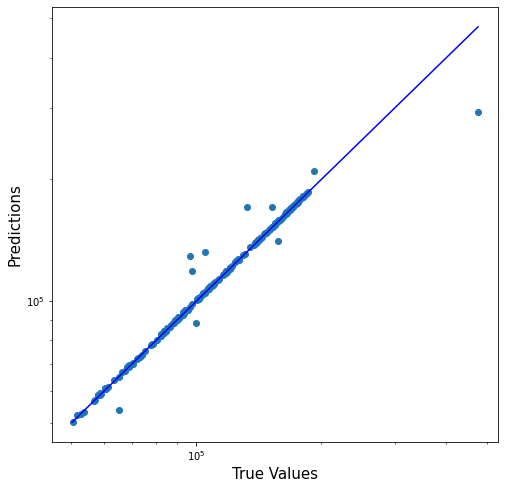

In [116]:
plt.figure(figsize=(8,8))
plt.yscale('log')
plt.xscale('log')
plt.scatter(Target_test, Target_predictions)

p1 = max(max(Target_predictions), max(Target_test))
p2 = min(min(Target_predictions), min(Target_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.show()